# 1.この課題の目的
データ分析の基本的な流れを知る  
PandasやMatplotlibに慣れる  
Kaggleのカーネルを利用する


# 2.エイムズ市の住宅価格
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。

エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。  
https://en.wikipedia.org/wiki/Ames,_Iowa

# 3.Kaggleのカーネル
Kaggleでは「カーネル」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。  
良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、  
課題になっていないことに挑戦したりしてください。

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  
https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner  
https://www.kaggle.com/mjbahmani/ds-workflow-for-hp-10-ml-algorithms-12-plot  
https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos  
https://www.kaggle.com/katotaka/prediction-house-prices-eda/data 日本語で参考になった  
http://ochearno.net/house_prices_top3percentile-2  参考ブログ

# 4.データセットの準備
データセットはKaggleからダウンロードします。

## 【課題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns', 100) #カラムの表示を省略されないように１００に設定

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train['Fence'].unique() #ユニークな要素の値のarray

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [5]:
train.tail() #後ろから取得

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
train.sample(5)  #randamに取得

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
577,578,80,RL,96.0,11777,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,5,6,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,97.0,TA,TA,CBlock,TA,TA,Av,LwQ,328,ALQ,551,285,1164,GasA,Ex,Y,SBrkr,1320,0,0,1320,1,0,1,0,3,1,TA,6,Typ,2,Fa,Attchd,1966.0,RFn,2,564,TA,TA,Y,160,68,240,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Abnorml,164500
409,410,60,FV,85.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,100.0,Gd,TA,PConc,Ex,TA,No,GLQ,789,Unf,0,245,1034,GasA,Ex,Y,SBrkr,1050,1028,0,2078,1,0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2008.0,Fin,3,836,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,4,2008,New,Partial,339750
210,211,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468,Unf,0,396,864,GasA,TA,N,FuseA,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Normal,98000
697,698,20,RL,57.0,6420,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Ex,Gd,Mn,LwQ,210,ALQ,551,219,980,GasA,Fa,Y,FuseA,1148,0,0,1148,0,1,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1,308,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,123500
676,677,70,RM,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,2,1900,1950,Gable,CompShg,AsbShng,Stucco,None,0.0,TA,TA,BrkTil,TA,Fa,No,Unf,0,Unf,0,1095,1095,GasW,Fa,N,SBrkr,1095,679,0,1774,1,0,2,0,4,2,TA,8,Min2,0,NaN,2Types,1920.0,Unf,3,779,Fa,Fa,N,0,0,90,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,87000


## 【課題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、  
どのようなデータセットかを説明してください。前回扱ったirisデータセットとの比較もすると良いでしょう。

アイオワ州エイムスの住宅のほぼあらゆる側面を説明する79の特徴量が入っている。  
irisデータセットと違うのは、データタイプがobjectも含まれている。また欠損値がある。  
（データセットの説明はdata_description.txtを読むことでわかる）

In [7]:
train.shape

(1460, 81)

# 5.データの概観
## 【課題3】データの確認
「Week3授業前課題1アヤメを分析しよう」と同様に、データを確認していきます。  
コードとマークダウンを組み合わせてレポートしてください。

### 各特徴量がどういったものかを見る。（数値データか文字データなど）  


・数値データと文字データが混在している　（dtypes: float64(3), int64(35), object(43)）

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### 今回の目的変数はどの列か確認する。  

Data fieldsより  
SalePrice - 施設の売却価格（ドル）。これは予測しようとしているターゲット変数です   
"SalePrice"　が目的変数

### 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [9]:
train.describe() #特徴量の平均値と標準偏差、四分位数を一度に表示させる。

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【課題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

### 各特徴量の欠損値の有無を確認する。  
欠損値の確認にはmissingnoというライブラリを活用しましょう。  
このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。  

ResidentMario/missingno: Missing data visualization module for Python.
https://github.com/ResidentMario/missingno

In [10]:
import missingno as msno

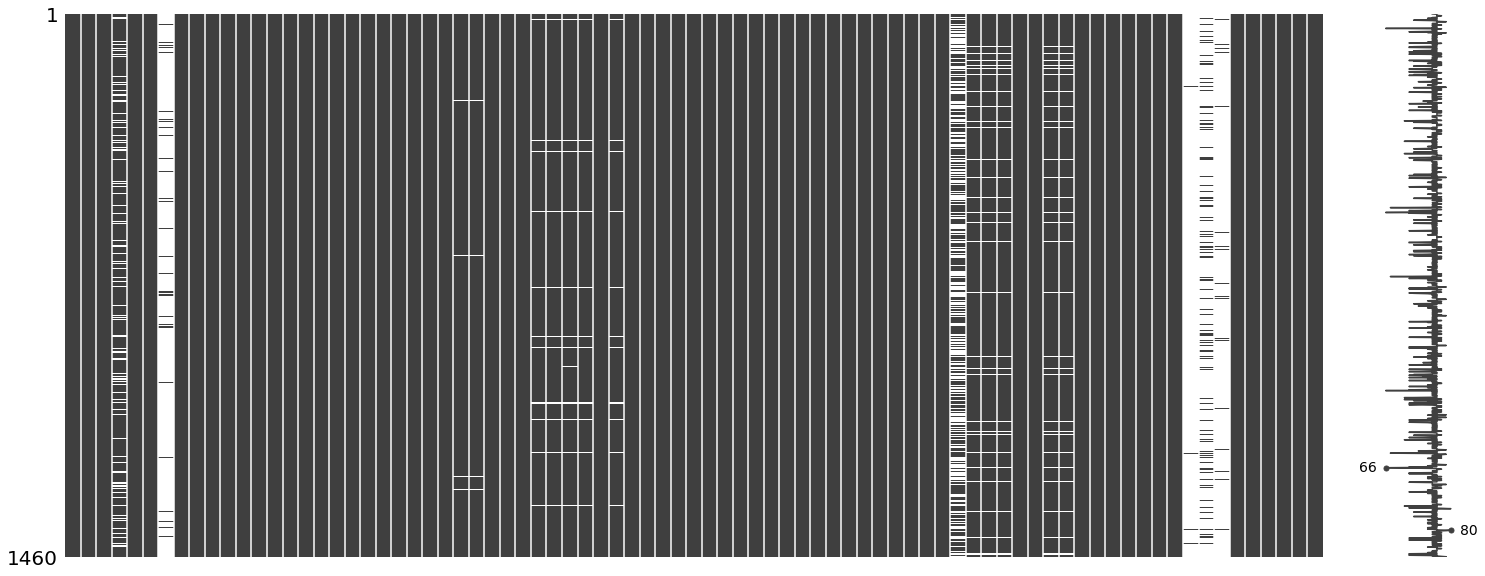

In [11]:
msno.matrix(train) #66が一番少ないデータ数、８０が一番多いデータ数(欠損なし)

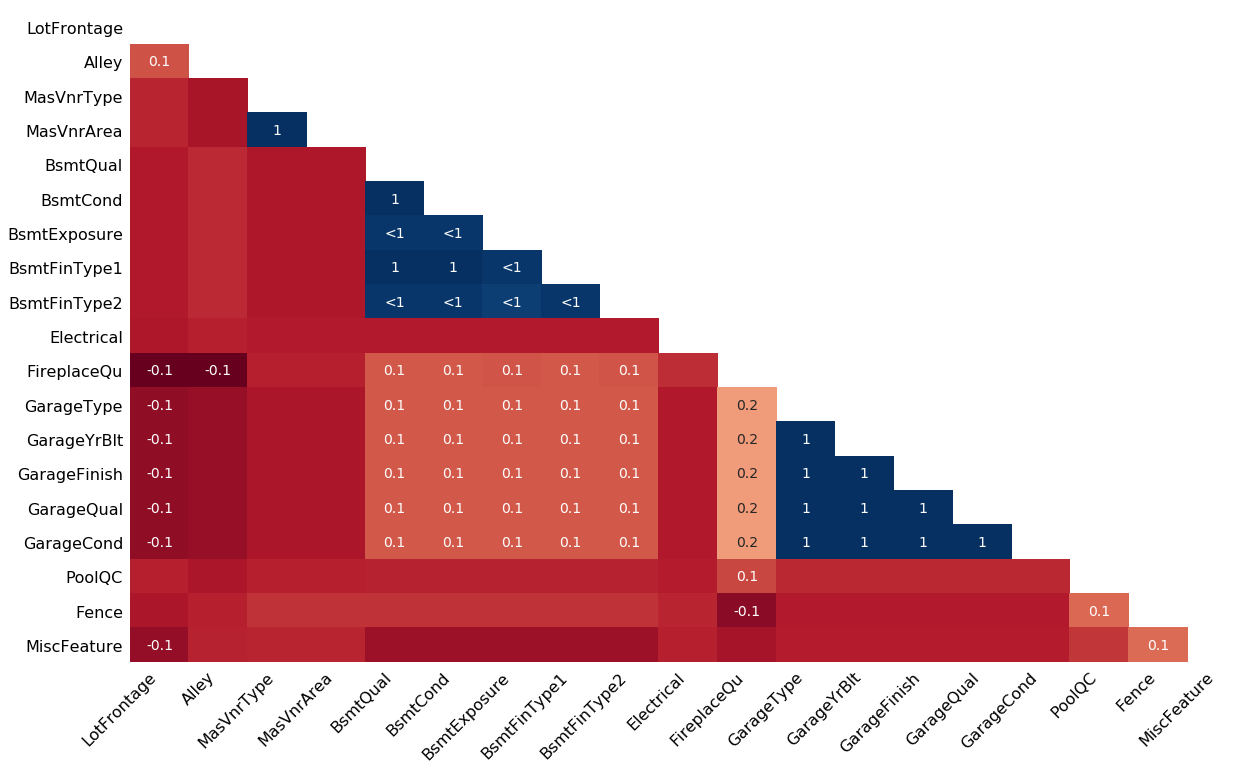

In [12]:
msno.heatmap(train) #各列の欠損値の発生箇所についての相関

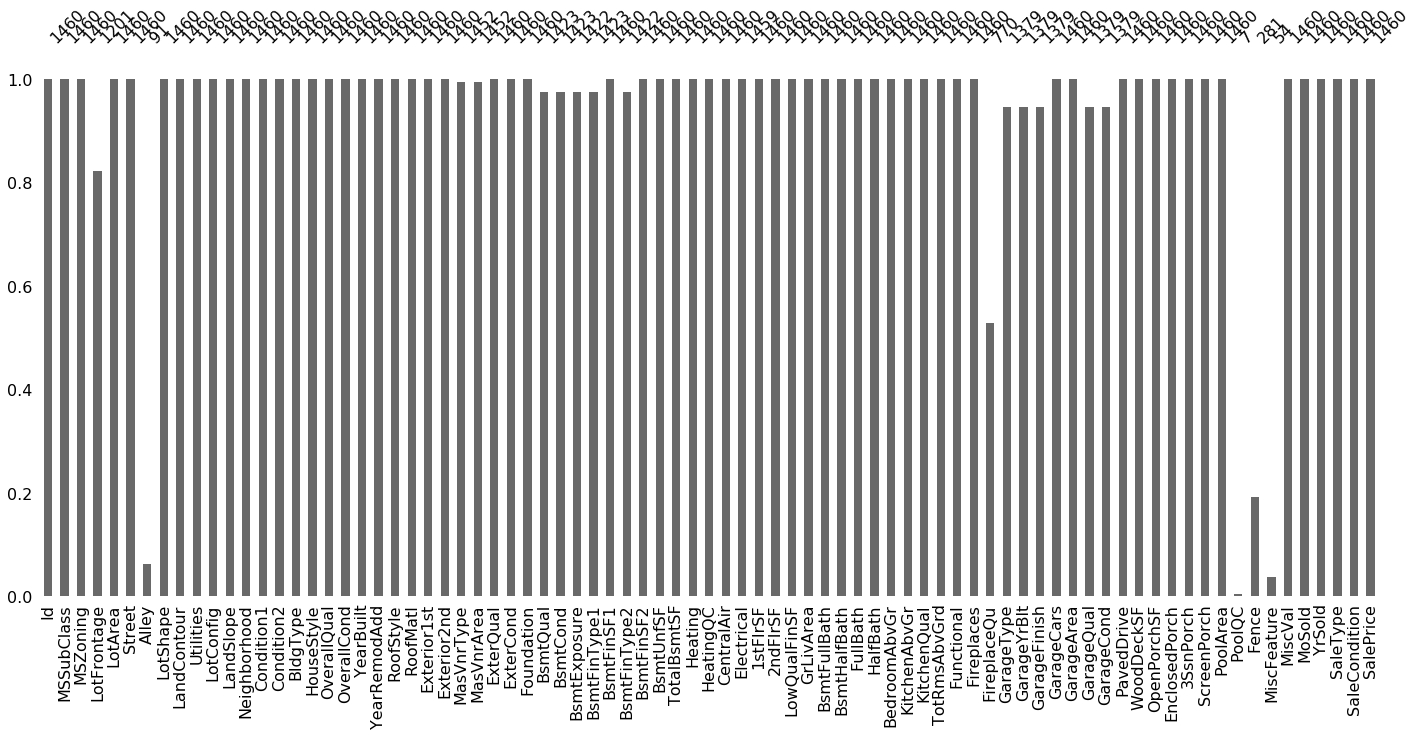

In [13]:
msno.bar(train) #棒グラフ

樹形図作り方
https://www.albert2005.co.jp/knowledge/data_mining/cluster/hierarchical_clustering

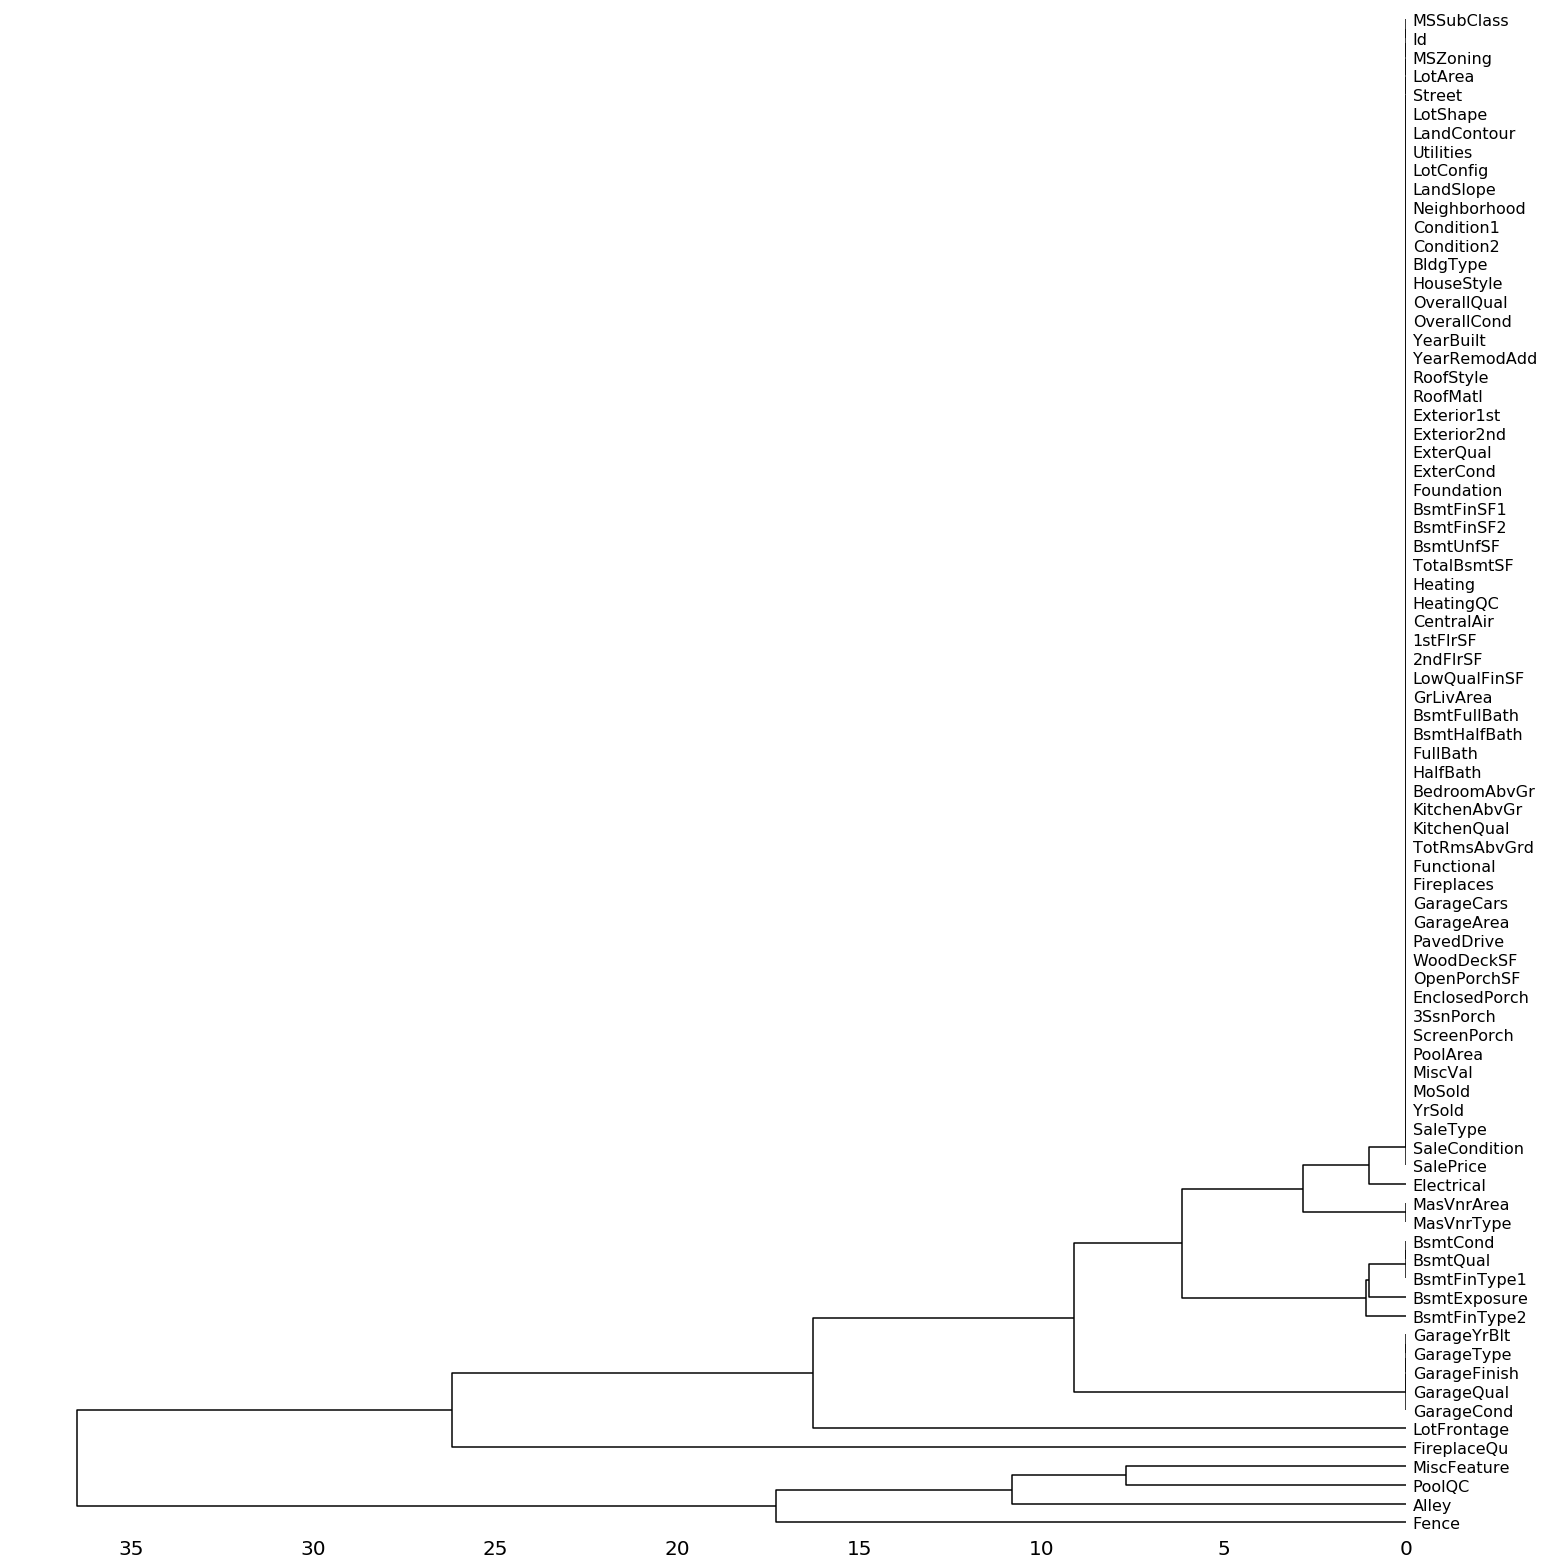

In [14]:
msno.dendrogram(train)
#樹形図
#樹形図を使用すると、変数の相補的により完全に相関させることができ、相関ヒートマップに表示されるペアワイズよりも深い傾向が明らかになります。

### 欠損値が何パーセント含まれているか

In [15]:
#欠損数をDataFrameの行数で割れば、欠損率になる。
null_count = train.isnull().sum()
null_rate = train.isnull().sum() / len(train)

DataFrameにまとめて欠損率順にsortすると見やすい。

In [16]:
null_table = pd.DataFrame({'null_count': null_count, "null_rate": null_rate}) #辞書型で入れるといい感じになった
null_table.sort_values(by='null_rate', ascending=False).head(20)

,null_count,null_rate
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


### 5つ以上欠損値がある特徴量（列）は削除する。
drop参考　https://deepage.net/features/pandas-drop.html

In [17]:
train2 = train
a = train2.isnull().sum() > 5

In [18]:
drop_list = train2.isnull().sum()[a].index #true( 欠損値>5） のインデックスのみを抜き出す。
print(drop_list)
drop_list.shape

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')


(18,)

In [19]:
train2 = train.drop(drop_list,axis=1) #列を消すときはaxis=1  

In [20]:
train2.isnull().shape #列が減っていることを確認

(1460, 63)

### 欠損値があるサンプル（行）は削除する。

行に沿ってまたは列に沿ってTrueの要素があるかどうかを列または行のSeriesで返すメソッドがany()です．  
行に沿って調べ列を返すには引数axis=1とします．複数の列が存在するときは（DataFrameは複数列存在）一つでもTrueがある行はTrueになります．  
https://estuarine.jp/2017/09/extract_rows_with_nan/

In [21]:
b = train2.isnull().any(axis=1) #anyを使うと簡単

In [22]:
train2[b]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,0,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,2,400,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


In [23]:
drop_index = train[b].index

In [24]:
train3 = train2.drop(drop_index) #dropはデフォルトで行なので、インデックスだけ入れれば消せる。配列で複数消去も可能

In [25]:
train3.shape #行が一つ減っていることを確認

(1459, 63)

# 6.目的変数
次は目的変数がどのような分布を持っているか確認していきます。

## 【課題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

### 尖度（せんど）(Skewness)

「尖度」とは、分布の尖り具合，あるいは分布の裾の重さを表す指標  
0未満のときは尖りが緩やかで裾が短い。0より大きいときは尖りが急で裾が長い。正規分布では0となる。  
※一般的定義としては，グラフがゼロの近づく部分を裾という

### 歪度（わいど）(Kurtosis)

歪度（わいど）は平均まわりの三次モーメントを標準偏差で正規化したもので，分布の歪み具合（どれくらい非対称なのか）を表します。  
左右対称の分布（例えば正規分布）の場合には0になります。

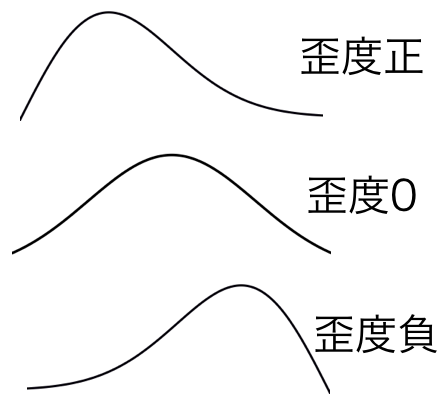

In [26]:
from IPython.display import Image, display_png
display_png(Image("waido.png"))

## 【課題6】分布の確認
### seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  

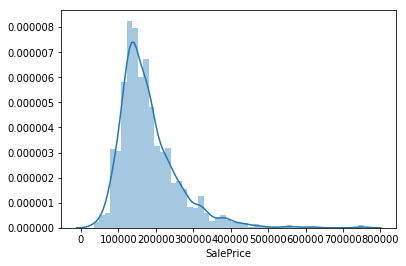

In [27]:
#distplotでヒストグラムを作成
sns.distplot(train3["SalePrice"], kde=True, rug=False) #kde=true カーネル密度推定値も表示

In [28]:
print("Skewness :", train3["SalePrice"].skew())
print("Kurtosis :", train3["SalePrice"].kurt())
#尖ってる＋かなり左に偏っている

Skewness : 1.8819429948035529
Kurtosis : 6.529263049673958


http://www.ie-kau.net/entry/kernel_density_est

#### カーネル密度推定って？  
カーネル密度推定は、一言で表すと「なめらかなヒストグラム」です。  
なめらかなヒストグラムを利用して、実際のいくつかのデータ（標本）から、  
全体の分布を推定する事ができます。 左がヒストグラムで、右がそれを元にして作成したカーネル密度分布のグラフです。 

どういうときに使うといいの？　  
ヒストグラムとは違い曲線になっているので、X値に対応するYを取ることが出来ます。  
あくまで推定ではありますが、おおよそX=0.2635ならY=2.45など、あらゆる値に対応できるようになります。

カーネル密度分布を書くことで、複数の突出（peak）がある場合に異なる複数の母集団から標本が抽出されている可能性がわかったり、  
複数のカーネル密度分布を足し合わせたときに視覚的な比較優位を取ることが出来ます。



### 目的変数に対して対数変換を行う。  
尚、対数変換をかける場合は最後の予測の際に
EXPを取ることを忘れないようにする必要があります。

In [29]:
target_name = "SalePrice"

In [30]:
log_target = np.log(train[target_name]) #対数変換

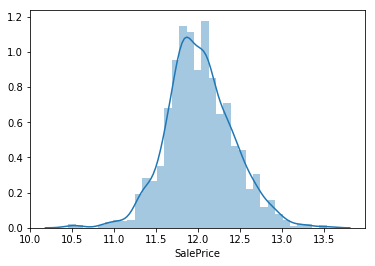

In [31]:
sns.distplot(log_target)

In [32]:
print("Skewness :", log_target.skew())
print("Kurtosis :", log_target.kurt())

Skewness : 0.12133506220520406
Kurtosis : 0.8095319958036296


### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

In [33]:
import math
a = np.log(2)
b = np.log(3)

In [34]:
math.e**(a + b)  #対数を使うことでかけ算を足し算にできる

5.999999999999999

In [35]:
math.e**(a - b)  #対数を使うことで割り算を引き算にできる

0.6666666666666666

参考　https://atarimae.biz/archives/12581  
「かけ算を足し算に、累乗をかけ算に落としこみ、計算をカンタンにできる」  
対数を扱う意義のひとつは、小さな数で大きな数を扱えるということです。  
指数をもとの数の代理人にたてて扱う対数は、きわめて巨大な数でも、扱いやすいはるかに小ぶりな数でシミュレートすることができます。

歪度が正の値を取り, 尖度が大きく分布が全体として上の方に裾を引い  
ている場合、対数変換すると正規分布に近づくことが多い。

対数変換とは、対数正規分布にしたがう変数の対数をとって正規分布に従う変数を作ること。  
対数変換により、少数や、巨大な数値などを整理・表現しやすくすることができる。

## 【課題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

補足

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。  
このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。



### 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

In [36]:
#相関係数をpandasで作成
train_corr = train3.iloc[:,1:].corr(method='pearson')

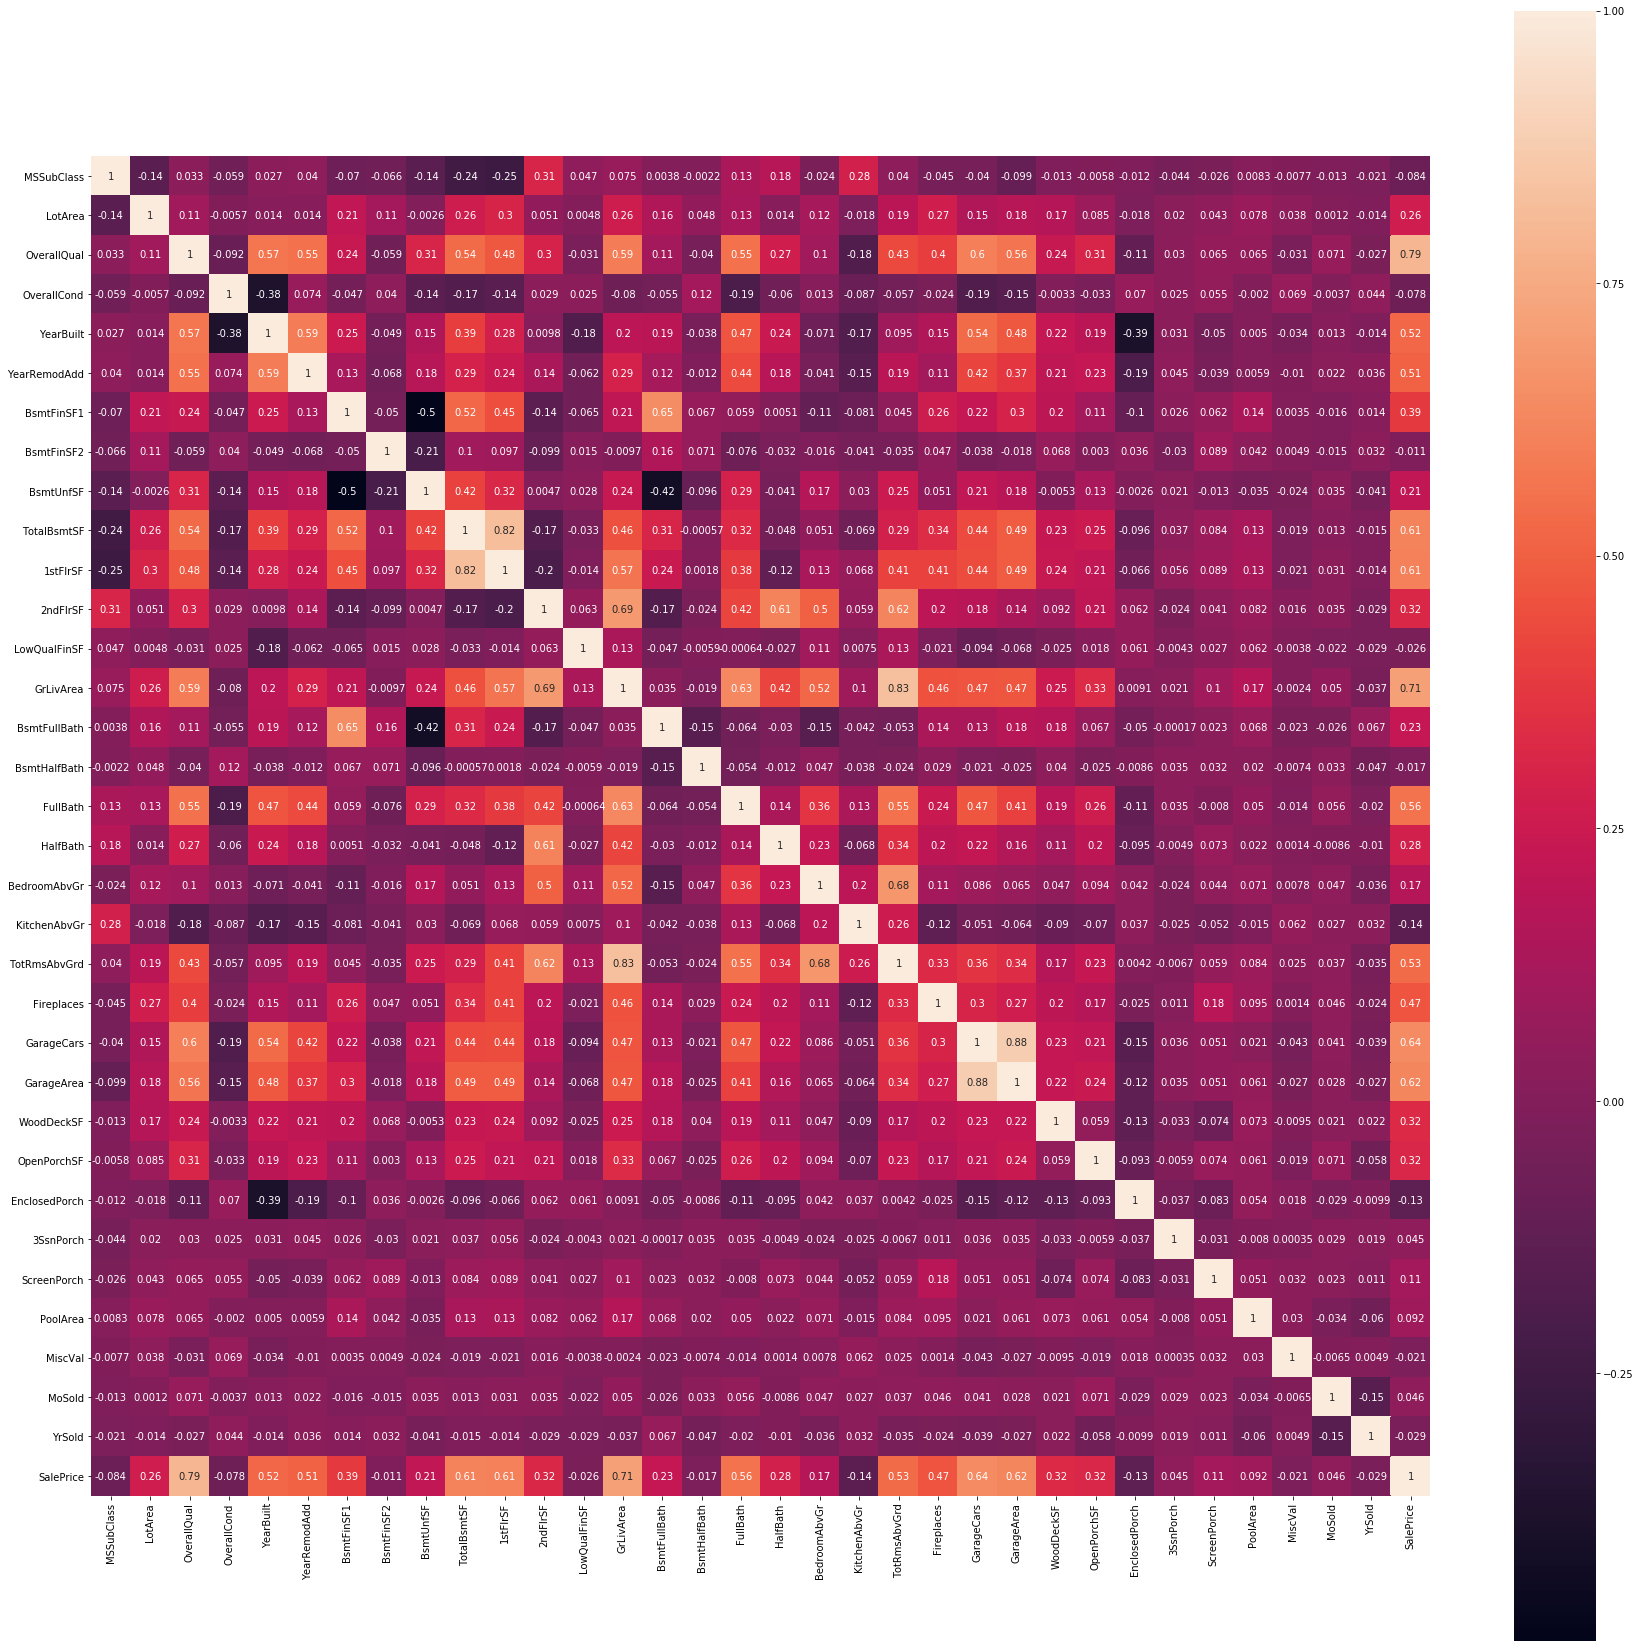

In [37]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(train_corr, square=True, annot=True) # annot=True:格子の中に値を表示

In [38]:
#train_corr[(train_corr > 0.7) & (train_corr < 1)]

### 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [39]:
index_list = train_corr.sort_values(by=target_name, ascending=False)[target_name].head(11) #ソートしてsaleprice以外の１０個出力
index_list = index_list[1:] #salespriceを消す
index_list

OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
YearRemodAdd    0.507430
Name: SalePrice, dtype: float64

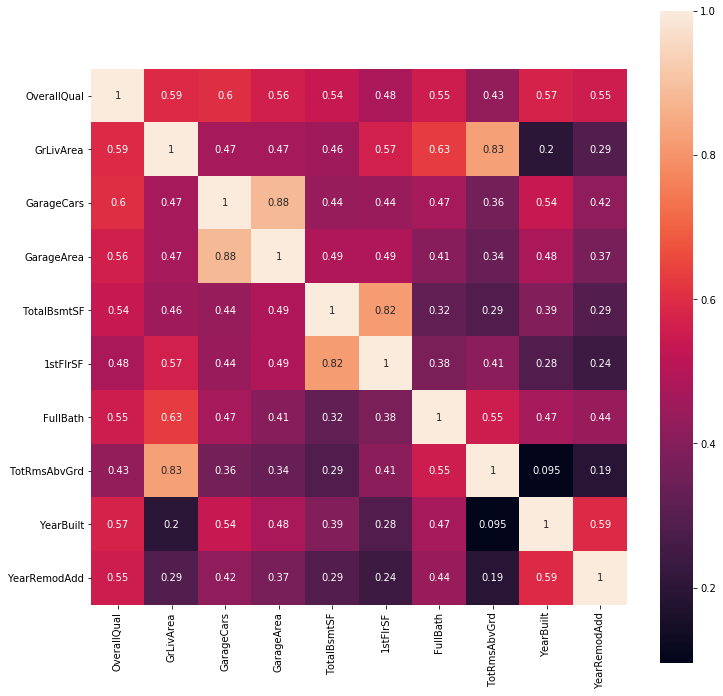

In [40]:
#特徴量１０個だけのヒートマップ作成
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_corr.loc[index_list.index,index_list.index], square=True, annot=True) # annot=True:格子の中に値を表示

### 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

- OverallQual: Overall material and finish quality  
全体的な素材と仕上げの品質(多分１から１０の評価）


- GrLivArea: Above grade (ground) living area square feet  
地上のリビングエリアの広さ　平方フィート


- GarageCars: Size of garage in car capacity  
ガレージの広さ　車の台数分


- GarageArea: Size of garage in square feet  
ガレージの広さ　平方フィート


- TotalBsmtSF: Total square feet of basement area  
地下面積の総平方フィート


- 1stFlrSF: First Floor square feet  
一階の広さ　平方フィート


- FullBath: Full bathrooms above grade  
地上にあるフルバスルームの数  
フルバスルームは、トイレットと洗顔用洗面所とバスタブ（シャワー付き）の3点が揃った部屋のこと。  


- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)  
地上の総部屋数（バスルームは含まない）  


- YearBuilt: Original construction date  
建設した年　西暦  


- YearRemodAdd: Remodel date  
改築した年　西暦  

メンターより：相関が高い特徴量2つに注目し，なぜこの2つの特徴量の相関が高いのか？などを考察すると我々の直感と当たっていたり，外れていたりなど，新たな発見もあります．今回の課題ではないですが，データ探索だけでなく，探索した結果何がわかるのか，考察の部分も大事にしていきましょう．

### 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [41]:
def print_sort_corr(X):
    """
    相関関数を受け取り、値が高い順番に並び替えます
    
    Parameters
    ---------------
    X: DataFrame
    相関係数のデータフレーム
    
    return
    --------------
    df: DataFrame
    """
    import itertools
    #（特徴量,特徴量）のかぶりなしの組み合わせ全部。combinationsすると同じラベル同士は消える。
    com_list = list(itertools.combinations(X, 2))
    df = pd.DataFrame([[(i,j),X.loc[i,j]] for i,j in com_list],columns=['pairs','corr'])
    df = df.sort_values(by='corr',ascending=False) #sort
    return df

In [42]:
train4 = train3.loc[:,index_list.index]
train_y = train3.loc[:,target_name]
top10_corr = train_corr.loc[index_list.index,index_list.index]

In [43]:
print_sort_corr(top10_corr).head(3) #相関係数が高いベスト３

,pairs,corr
17,"(GarageCars, GarageArea)",0.882613
14,"(GrLivArea, TotRmsAbvGrd)",0.825576
30,"(TotalBsmtSF, 1stFlrSF)",0.819393


In [44]:
#salepraiceの相関係数
train_corr.sort_values(by=target_name,ascending=False)[target_name].head(10)

SalePrice       1.000000
OverallQual     0.791069
GrLivArea       0.708618
GarageCars      0.640473
GarageArea      0.623423
TotalBsmtSF     0.613905
1stFlrSF        0.605968
FullBath        0.560881
TotRmsAbvGrd    0.533779
YearBuilt       0.523273
Name: SalePrice, dtype: float64

In [45]:
top10_corr.sum() #相関係数の合計値

OverallQual     5.873374
GrLivArea       5.493220
GarageCars      5.616236
GarageArea      5.485355
TotalBsmtSF     5.030630
1stFlrSF        5.106616
FullBath        5.224889
TotRmsAbvGrd    4.491248
YearBuilt       4.622034
YearRemodAdd    4.388605
dtype: float64

#### 落とす際は、目的変数であるSalePriceに対しての相関係数が低いものから順に落とすといいらしいので   
http://ochearno.net/house_prices_top3percentile-2

GarageCars 　TotRmsAbvGrd　　 1stFlrSF　を落とします

In [46]:
d = ["GarageCars","TotRmsAbvGrd","1stFlrSF"]
train5 = train4.drop(d, axis=1)
train5.shape

(1459, 7)

## (オプション）【課題8】重要度の算出
ランダムフォレストという機械学習手法を用いることで、重要度の値を算出できます。  
この値は推定を行った時に、各特徴量がどれだけ推定値に寄与しているかを表すものです。  
ランダムフォレストは推定によく使われる手法ですが、ここでは推定自体が目的ではなく、あくまで重要度を算出するために使います。



ランダムフォレストとは　https://mathwords.net/randomforest

不純度の考え方　http://www.randpy.tokyo/entry/decision_tree_theory

木の剪定について　http://www.randpy.tokyo/entry/decision_tree_theory_pruning

バギングについて　http://www.randpy.tokyo/entry/random_forest

pythonでランダムフォレスト　タイタニック　http://www.randpy.tokyo/entry/python_random_forest

特徴量の重要度について参考になったページ　http://tekenuko.hatenablog.com/entry/2016/09/20/222453

#### ブートストラップサンプリングは、
学習データを元に復元抽出して別のデータセットを作る、  
という操作を繰り返し行うことで、新しいデータセットを複数作るというものです。

#### バギングは、
ブートストラップサンプリングで得られた学習データを使って、識別器を複数作り、それらの識別器の多数決をとることによって、  
一つの識別器よりも性能の高いモデルを作ることができます。  
複数の識別器の違いは、ブートストラップサンプリングのばらつきによるものなので、  
似たような識別器が多く作られてしまう可能性が高く、性能の良いモデルにならないことがあります。  

#### ランダムフォレストはバギングを改良して、多様な識別器をいっぱい作る手法。  
先ほどのバギングでは、識別器の違いがブートストラップサンプリングのばらつきによることだけだったのに対して、  
ランダムフォレストでは、それに加えて、各識別器で使用する特徴量を、あらかじめ決められた数だけランダムに選択するようにしてあげます。  
多様性が得られる。

#### ランダムフォレストの特徴は以下のようなものが挙げられます。  
- 森のサイズ(識別器の数)を大きくしても過学習が生じにくい  
- #### 特徴量の重要度を計算できる  
- 学習データ間の近さを計算することができる

#### 特徴量の重要度は、各特徴がノードで使われた時の不純度の減少量を識別器全体で平均して算出します。  
用途にもよりますが、変数作成の際の指標としても使えますし、レポートする場合などにも便利ですね。

In [47]:
from sklearn.model_selection import train_test_split
#データを分割
(X_train, X_test, y_train, y_test) = train_test_split(train5, train_y, test_size = 0.3, random_state = 666)
#test_size= テストデータの割合を 0.0 〜 1.0 の間で指定します
#random_state=乱数生成のシードとなる整数

In [48]:
# 回帰の場合はRegressor
from sklearn.ensemble import RandomForestRegressor

#モデル構築、n_estimators ： （デフォルト= 10）　森の中の木の数
rf_reg = RandomForestRegressor(n_estimators=10)
rf_reg = rf_reg.fit(X_train, y_train)

fti = rf_reg.feature_importances_

print('Feature Importances:')
for i, feat in enumerate(train5.columns):
    print('\t{0:10s} : {1:>.6f}'.format(feat, fti[i]))

Feature Importances:
	OverallQual : 0.614988
	GrLivArea  : 0.134261
	GarageArea : 0.064878
	TotalBsmtSF : 0.114430
	FullBath   : 0.014539
	YearBuilt  : 0.027294
	YearRemodAdd : 0.029610


In [49]:
aa = np.array([2,4,3,1,0,5,6])

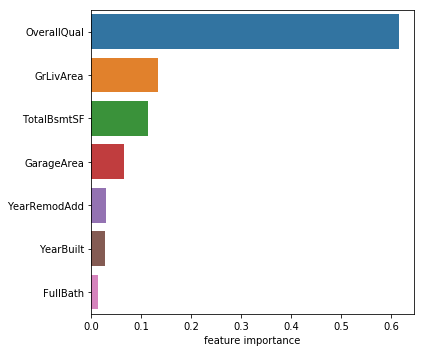

In [50]:
# np.argsort()はソート結果の配列のインデックスを返す。引数の頭に"-"をつけると降順。
# つまり"-fti(feature_importances_)"を引数にする事で重要度の高い順にソートした配列のインデックスを返す。
ranking = np.argsort(-fti)
f, ax = plt.subplots(figsize=(6, 5))
sns.barplot(x=fti[ranking], y=X_train.columns.values[ranking], orient="h")
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

## （オプション）【課題9】さらなる探索
Kaggleのカーネルを参考に、ここまでの課題にないことにも挑戦し、ノートブックにまとめてください。

## 標準化(Standardization)で特徴量の尺度を揃える  
特徴量、つまりfeatureが複数ある場合、featureによって数字の大きさや単位が異なる。

例えば、カラムAの値が300cmでカラムBの値が3mの場合、何もしなければ値がそのまま代入されてしまうため、  
影響度が同じであってもカラムAの影響が大きくなってしまう。

y = 100 + θ1 3,000 + θ2 10

標準化は、この数字の大きさや単位の影響をなくしてしまい、それぞれの尺度を同じ尺度の値に揃えるための手法。

データを一定の方法で変形し、例えば身長と体重みたいな次元が違うものに対しても、なんとかして同じような単位で取り扱えるようにして、  
計算や比較しやすくしようというのが狙いのもの。

In [51]:
# z-scoreにて標準化
# (値 - 平均) / 標準偏差
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

## SalePriceと各Featureの関係を調べる  
SalePrice / 各Featureのプロット図を表示

In [ ]:
# y_trainを対数変換(忘れ手たので今更)
y_train = np.log(y_train)

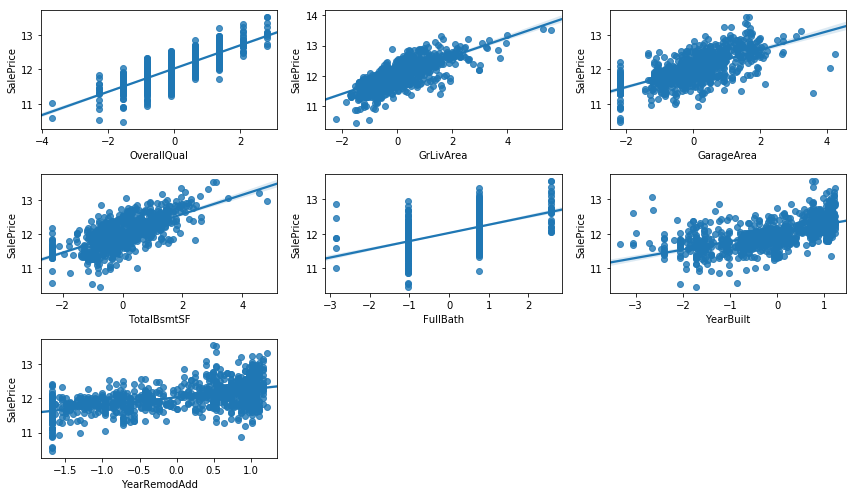

In [67]:
# relation to the target
fig = plt.figure(figsize=(12,7))
for i in np.arange(7):
    ax = fig.add_subplot(3,3,i+1) #fig.add_subplot(行,列,場所)
    sns.regplot(x=X_train.iloc[:,i], y=y_train)

plt.tight_layout()
plt.show()

## 外れ値(outlier)を削除
TotalSFとGrLivAreaの外れ値を削除

In [62]:
Xmat = X_train
Xmat['SalePrice'] = y_train
Xmat[(Xmat['TotalBsmtSF'] > 5) & (Xmat['SalePrice'] < 12.5)].index


Int64Index([1298], dtype='int64')

In [69]:
# outlier deletion
Xmat = X_train
Xmat['SalePrice'] = y_train
Xmat = Xmat.drop(index = Xmat[(Xmat['TotalBsmtSF'] > 5) & (Xmat['SalePrice'] < 12.5)].index)
Xmat = Xmat.drop(index = Xmat[(Xmat['GrLivArea'] > 5) & (Xmat['SalePrice'] < 13)].index)

# recover
y_train = Xmat['SalePrice']
X_train = Xmat.drop(['SalePrice'], axis=1)

## モデルの作成
線形回帰分析での予測¶

In [71]:
from sklearn.linear_model import LinearRegression

In [136]:
# アルゴリズムに線形回帰(Linear Regression)を採用
slr = LinearRegression(normalize = True)

# fit関数で学習開始
slr.fit(X_train,y_train)

# 偏回帰係数(回帰分析において得られる回帰方程式の各説明変数の係数)を出力
# 偏回帰係数はscikit-learnのcoefで取得
print('傾き：{0}'.format(slr.coef_[0]))

# y切片(直線とy軸との交点)を出力
# 余談：x切片もあり、それは直線とx軸との交点を指す
print('y切片: {0}'.format(slr.intercept_))

傾き：0.11708841901032548
y切片: 12.026679166170227


In [137]:
# 学習済みのモデルから予測した結果をセット
# logで小さくなった尺度をexpで戻す
y_test_pred = np.exp(slr.predict(X_test))

In [128]:
y_test_pred #予測値

array([ 144159.1501814 ,  109192.86700942,  256138.71142157,
        133314.651593  ,  100320.57315352,  157007.1595301 ,
        230389.2950553 ,  332455.70399874,  203163.74933345,
        140130.01466143,  162929.20343398,  189852.52846818,
        124540.87109935,  115490.68852966,  110558.22311002,
        185492.34737434,  141935.82350326,  192361.25326946,
        145819.11212889,  115558.79039612,  136161.95453595,
        152268.14360647,  246268.19330151,  122853.37285991,
        118830.79829691,  219426.492276  ,  267331.8703176 ,
         88833.07157922,  164545.51210186,  229028.87542932,
        240775.56869081,  134629.54412574,  179772.45240823,
        293254.34550076,  299031.62584876,  100977.56316723,
         76928.57010823,   97868.54749626,  178664.08436481,
        103112.39315776,  199981.00265278,  194674.47512754,
        170574.80202386,  166586.63882034,  141377.14508537,
        246360.20973582,  173161.18664866,  127367.24664427,
        230752.88320723,

## scikit-learn で回帰モデルの結果を評価する

In [129]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

参考ページ
https://pythondatascience.plavox.info/scikit-learn/%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AE%E8%A9%95%E4%BE%A1

#### 平均絶対誤差 (MAE)
平均絶対誤差 (MAE, Mean Absolute Error) は、実際の値と予測値の絶対値を平均したものです。  
MAE が小さいほど誤差が少なく、予測モデルが正確に予測できていることを示し、  
MAE が大きいほど実際の値と予測値に誤差が大きく、予測モデルが正確に予測できていないといえます。

In [138]:
mean_absolute_error(y_test, y_test_pred) #平均絶対誤差 (MAE)

22163.67369211664

#### 平均二乗誤差 (MSE)
平均二乗誤差 (MSE, Mean Squared Error) とは、実際の値と予測値の絶対値の 2 乗を平均したものです。  
この為、MAE に比べて大きな誤差が存在するケースで、大きな値を示す特徴があります。  
MAE と同じく、値が大きいほど誤差の多いモデルと言えます。計算式は以下となります。

In [139]:
mean_squared_error(y_test, y_test_pred) #平均二乗誤差 (MSE)

2967951040.514479

#### 二乗平均平方根誤差 (RMSE)
MSE の平方根を 二乗平均平方根誤差 (RMSE: Root Mean Squared Error) と呼びます。  
上記の MSE で、二乗したことの影響を平方根で補正したものです。RMSE は、RMSD (Root Mean Square Deviation) と呼ばれることもあります。  
計算式は以下となります。

In [140]:
np.sqrt(mean_squared_error(y_test, y_test_pred)) #二乗平均平方根誤差 (RMSE)

54478.90454583755

#### 決定係数 (R2)
決定係数 (R2, R-squared, coefficient of determination) は、  
モデルの当てはまりの良さを示す指標で、最も当てはまりの良い場合、1.0 となります  
(当てはまりの悪い場合、マイナスとなることもあります)。寄与率 (きよりつ) とも呼ばれます。

In [134]:
r2_score(y_test, y_test_pred)  #決定係数 (R2)

0.4420207183229419